In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [112]:
import wandb

wandb.login()

True

In [113]:
# wandb.init(project='new_IML_A3')

# Data

In [114]:
def split_pd_data(data):
    label_data = data.iloc[:8000, :]
    unlabel_data = data.iloc[8000:, :]

    return label_data, unlabel_data

## Raw data

In [115]:
train_raw_data = pd.read_csv('raw-data/train.csv')
test_raw_data = pd.read_csv('raw-data/test.csv')
val_raw_data = pd.read_csv('raw-data/valid.csv')

In [116]:
label_raw_data, unlabel_raw_data = split_pd_data(train_raw_data)

In [117]:
label_raw_data.shape, unlabel_raw_data.shape

((8000, 5), (5902, 5))

## embedding data

In [118]:
def split_np_data(data):
    label_data = data[:8000, :]
    unlabel_data = data[8000:, :]

    return label_data, unlabel_data

In [119]:
train_emb_data = np.load('embeddings-data/train-embeddings.npy')
val_emb_data = np.load('embeddings-data/valid-embeddings.npy')
test_emb_data = np.load('embeddings-data/test-embeddings.npy')

In [120]:
label_emb_data, unlabel_emb_data = split_np_data(train_emb_data)

In [121]:
label_emb_data.shape, unlabel_emb_data.shape

((8000, 384), (5902, 384))

***

## Using PCA to reduce dimensionality

In [122]:
pca = PCA(n_components=384)
train_emb_data = pca.fit_transform(train_emb_data)


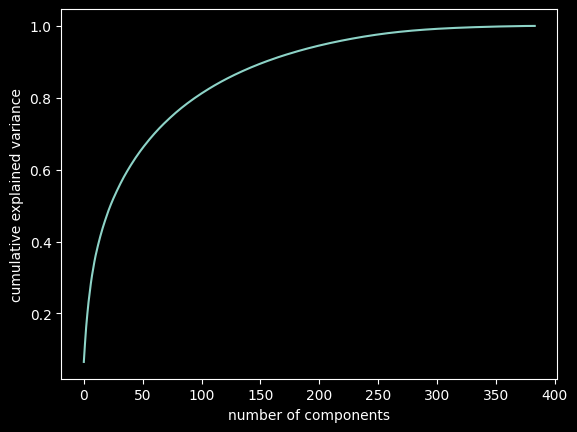

In [123]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [124]:
pca = PCA(n_components=2)
train_emb_data = pca.fit_transform(train_emb_data)
val_emb_data = pca.transform(val_emb_data)
label_emb_data = pca.transform(label_emb_data)

In [125]:
train_emb_data.shape

(13902, 2)

In [126]:
scaler = StandardScaler()
train_emb_data = scaler.fit_transform(train_emb_data)
val_emb_data = scaler.transform(val_emb_data)

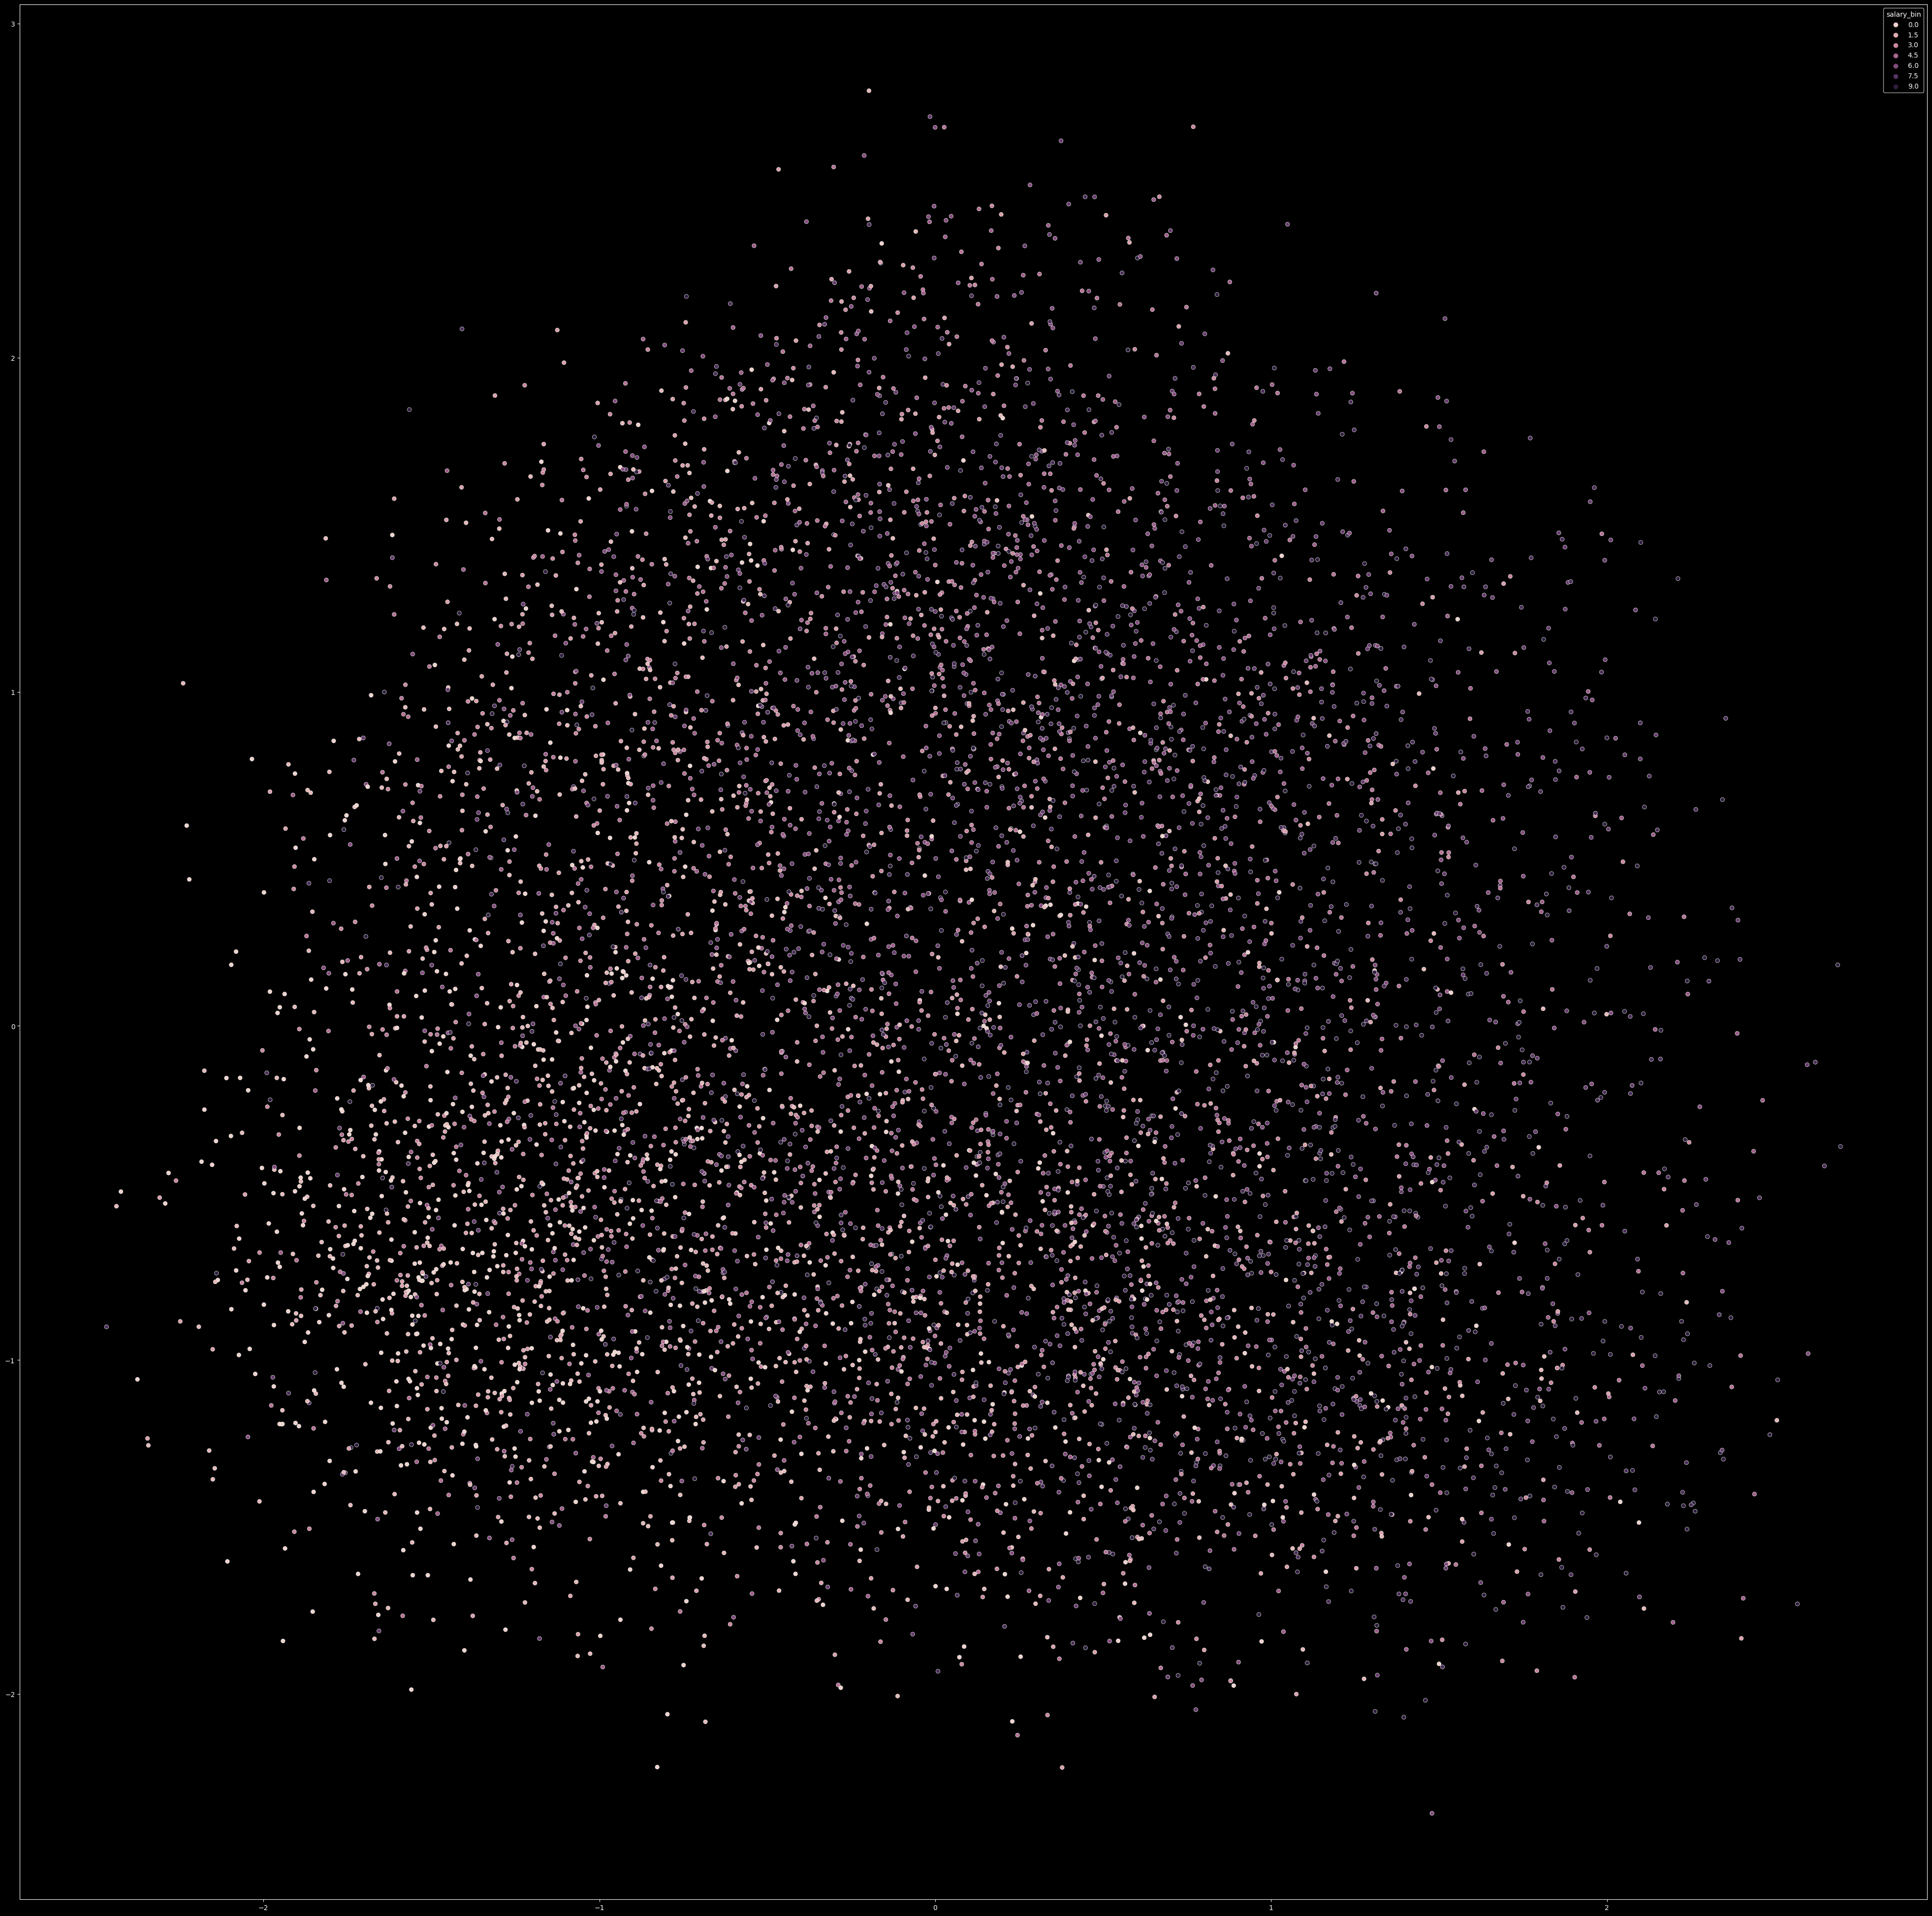

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size (width, height) in inches
fig, ax = plt.subplots(figsize=(50, 50))

# Plot the scatterplot using Seaborn
sns.scatterplot(x=train_emb_data[:, 0], y=train_emb_data[:, 1], hue=train_raw_data['salary_bin'], ax=ax)

# Show the plot
plt.show()

In [128]:
clf = LogisticRegression()
clf.fit(label_emb_data, label_raw_data['salary_bin'])

score = clf.score(val_emb_data, val_raw_data['salary_bin'])
print(score)

0.1445020149683362


## Base Line -- label data

In [129]:
# we set decision tree classifier as our base model
clf = DecisionTreeClassifier(random_state=0)
clf.fit(label_emb_data, label_raw_data['salary_bin'])

score = clf.score(val_emb_data, val_raw_data['salary_bin'])
print(score)

0.12780656303972365


## Base Line -- unlabel data

we use the whole dataset (include labeled data and unlabeled data) to train the model

In [130]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(train_emb_data)

predict = kmeans.predict(val_emb_data)

count = 0
for i in predict:
    true_label = val_raw_data['salary_bin']
    if true_label[i] == i:
        count += 1

score = count / len(predict)
print(score)

0.2556131260794473


In [131]:
wandb.sklearn.plot_clusterer(kmeans, val_emb_data, val_raw_data['salary_bin'])

wandb: 
wandb: Plotting Clusterer.


Error: You must call wandb.init() before wandb.log()

In [ ]:
wandb.finish()